In [2]:
import pandas as pd

In [18]:
#leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [19]:
#juntando arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [22]:
#verificando os tipos de dados do banco
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [21]:
#alterando o tipo de dado do LojaID.. não sera utilizado para calculos
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando Valores Faltantes**

In [23]:
#Consultando linhas com valores faltantes 
df.isnull().sum() #mostra a quantidade de valores nulos em cada coluna

Cidade    0
Data      0
Vendas    5
LojaID    0
Qtde      0
dtype: int64

In [24]:
#substituindo valores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [27]:
df["Vendas"].mean()

122.39469066366705

In [25]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [26]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
226,Salvador,2019-01-02,38.32,1035,2
37,Fortaleza,2019-01-01,35.86,1002,6
153,Natal,2019-01-02,17.41,1035,2
137,Salvador,2019-03-02,51.66,1036,3
32,Salvador,2019-01-01,151.27,1035,1
46,Aracaju,2018-01-01,41.42,1522,2
86,Aracaju,2018-01-01,154.92,1521,5
20,Fortaleza,2019-01-01,39.68,1003,2
16,Recife,2019-01-01,19.95,980,8
113,Aracaju,2018-01-01,23.05,1521,9


In [28]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace = True)

In [29]:
#apagando as linhas com valores nulos
#nesse caso sera verificado todas as colunas
df.dropna(inplace = True)

In [30]:
#apagando as linhas com valores nulos com base apenas em 1 coluna nesse exemplo
#apenas na coluna de vendas.. pode haver valores nulos em outras colunas mas serão ignorados
df.dropna(subset=["Vendas"], inplace = True)

In [33]:
#removendo linhas que esteham com valores faltantes em todas as colunas
df.dropna(how = "all", inplace=True)

**Criando novas colunas no arquivo**

In [34]:
#criando colunas de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [35]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [36]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [37]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [38]:
#retornando a maior receita
df["Receita"].max()

3544.0

In [39]:
#retornando a menor receita
df["Receita"].min()

3.34

In [40]:
#retornando estatisticas do banco
df.describe()

,Vendas,Qtde,Receita,Receita/Vendas
count,894.000000,894.000000,894.000000,894.000000
mean,122.394691,3.261745,386.725151,3.261745
std,166.683560,2.096964,574.659831,2.096964
min,3.010000,1.000000,3.340000,1.000000
25%,22.380000,2.000000,63.540000,2.000000
50%,44.160000,3.000000,155.675000,3.000000
75%,160.350000,4.000000,448.327500,4.000000
max,886.000000,10.000000,3544.000000,10.000000


In [41]:
#retorna o numero de maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [42]:
#retorne o numeor de menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [43]:
#agrupamento por cidade total de receita para cada cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48650.738763
Fortaleza     37913.970000
Natal        166908.309381
Recife        51397.262835
Salvador      40862.004072
Name: Receita, dtype: float64

In [46]:
#ordenando o conjunto de dados ordem descendente de receita
df.sort_values("Receita", ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


**Trabalhando com Datas**:

In [48]:
#transformando a coluna de data em tipo inteiro
#geralmente as datas vem como inteiro ou float
#convertendo para inteiro para depois converter para tipo data
df["Data"] = df["Data"].astype("int")

In [49]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [50]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,1514764800000000000,142.00,1520,1,142.00,1.0
1,Aracaju,1514764800000000000,14.21,1522,6,85.26,6.0
2,Aracaju,1514764800000000000,71.55,1520,1,71.55,1.0
3,Aracaju,1514764800000000000,3.01,1521,7,21.07,7.0
4,Aracaju,1514764800000000000,24.51,1522,8,196.08,8.0


In [51]:
#convertendo a data para o formato Data
df["Data"] = pd.to_datetime(df["Data"])

In [52]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [53]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [55]:
#agrupar dados pelo ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118079.018763
2019    227653.266288
Name: Receita, dtype: float64

In [56]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [57]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
74,Aracaju,2018-01-01,7.86,1520,2,15.72,2.0,2018
1,Recife,2019-01-01,11.44,983,1,11.44,1.0,2019
77,Natal,2019-04-01,426.00,853,3,1278.00,3.0,2019
190,Natal,2019-01-02,78.78,1035,3,236.34,3.0,2019
100,Fortaleza,2019-01-01,18.58,1003,1,18.58,1.0,2019


In [59]:
#criando o mês e dia
df["mes_venda"], df["dia_venda"] = df["Data"].dt.month, df["Data"].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
29,Recife,2019-01-01,10.18,980,8,81.44,8.0,2019,1,1
120,Aracaju,2018-01-01,7.73,1520,10,77.30,10.0,2018,1,1
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,9.0,2018,1,1
53,Aracaju,2018-01-01,8.64,1522,2,17.28,2.0,2018,1,1
55,Salvador,2019-01-01,36.62,1036,1,36.62,1.0,2019,1,1


In [58]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [61]:
#calculando a diferença de dia
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [62]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
55,Aracaju,2018-01-01,67.23,1520,8,537.84,8.0,2018,1,1,0 days
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27,238 days
83,Salvador,2019-01-01,63.66,1036,2,127.32,2.0,2019,1,1,365 days
42,Recife,2019-01-01,161.45,983,3,484.35,3.0,2019,1,1,365 days
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1,365 days


In [63]:
#criando coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [64]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,1.0,2019,1,1,365 days,1
27,Natal,2018-07-16,390.00,853,3,1170.00,3.0,2018,7,16,196 days,3
109,Natal,2019-01-02,124.37,1035,1,124.37,1.0,2019,1,2,366 days,1
72,Salvador,2019-01-01,149.47,1036,3,448.41,3.0,2019,1,1,365 days,1
169,Natal,2019-01-02,166.73,1037,2,333.46,2.0,2019,1,2,366 days,1


In [65]:
#filtrando as vendas de 2019 no mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [66]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


**Visualização de dados**

In [67]:
#contagem de vendas por loja ID
df["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

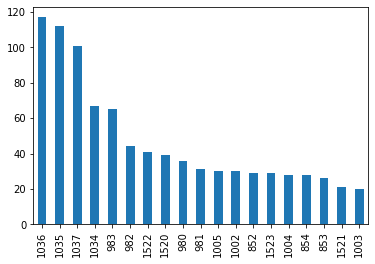

In [68]:
#grafico de barras
df["LojaID"].value_counts(ascending = False).plot.bar()

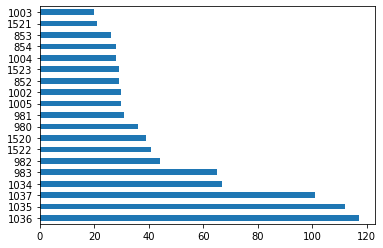

In [69]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending = False).plot.barh()

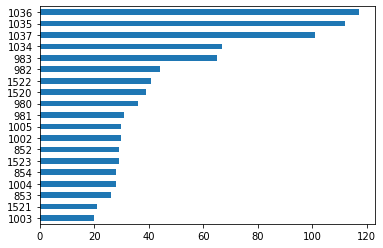

In [71]:
#grafico de barras horizontais do maior para o menor
df["LojaID"].value_counts(ascending = True).plot.barh();

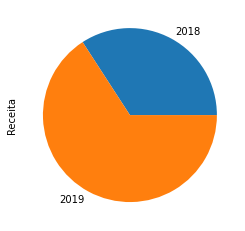

In [72]:
#grafico de pizza ano/receita
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [74]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

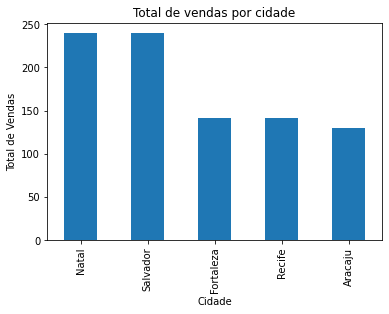

In [80]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

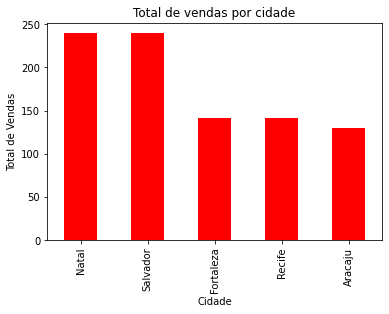

In [81]:
#mudando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [83]:
#alterando o estilo (obs: escolher estilo no site do matplotlib)
plt.style.use("ggplot")

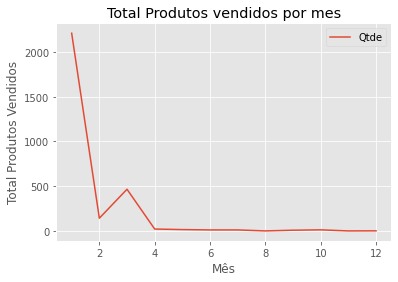

In [85]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos vendidos por mes")
plt.xlabel ("Mês")
plt.ylabel ("Total Produtos Vendidos");
plt.legend()

In [86]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [88]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [90]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

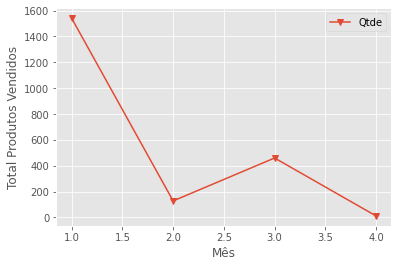

In [91]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel ("Mês")
plt.ylabel ("Total Produtos Vendidos");
plt.legend();

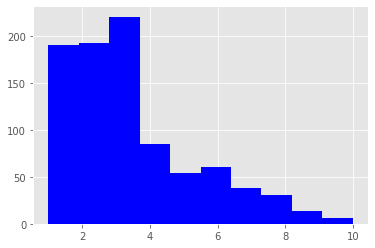

In [93]:
#PLOTADNO HISTOGRAMA 
plt.hist(df["Qtde"], color = "blue");

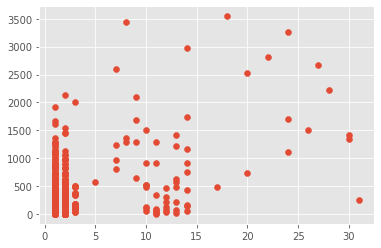

In [94]:
#grafico de dispessão
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"])

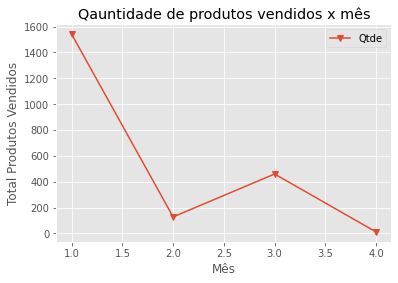

In [95]:
#salvando grafico em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Qauntidade de produtos vendidos x mês")
plt.xlabel ("Mês")
plt.ylabel ("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico Qtde x MES.png")